### Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


### Loading wine dataset


In [42]:
# Load the wine dataset
X, y = load_wine(as_frame=True, return_X_y=True)
df = X.copy()

# Check if data is loaded
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


# 1. Basic MinDist Classification

1. Load the wine data again, reusing the code from Lab 1. Only X and y are needed.
2. Implement the ML cycle using MinDist as classifier directly applied to the (unscaled)
wine data.
3. What accuracy score does your classifier achieve? Compare with your colleagues!
4. Does setting a random state change your results?


In [43]:
def split_data_with_given_random_state(dataset, classes, random_state, test_size):
    x_train, x_test, y_train, y_test = train_test_split(dataset, classes, test_size=test_size, random_state=random_state)
    return x_train, x_test, y_train, y_test

def check_accuracy_with_different_random_states(x, y, random_states, test_size):
    dict = {}
    for random_state in random_states:
        # get data for each random state
        x_train, x_test, y_train, y_test = split_data_with_given_random_state(x, y, random_state, test_size)

        # train new model
        mindist = NearestCentroid()
        mindist.fit(x_train, y_train)

        # predict
        y_hat = mindist.predict(x_test)

        # check accuracy
        performance = accuracy_score(y_test, y_hat)
        dict[random_state] = str(round(performance * 100, 2)) + "%"

    return dict




In [44]:
# set varaibles to test
random_states = [12, 21, 22, 28, 42, 55, 66, 78, 88, 93, 101, 123, 156, 189, 212]
test_size = 0.3

performances = check_accuracy_with_different_random_states(X, y, random_states, test_size)

df_perfomances = pd.DataFrame(performances.items(), columns=['Random state', 'Accuracy'])
df_perfomances.head(15)

,Random state,Accuracy
0,12,74.07%
1,21,64.81%
2,22,72.22%
3,28,74.07%
4,42,75.93%
5,55,77.78%
6,66,68.52%
7,78,70.37%
8,88,68.52%
9,93,68.52%


# Feature Extraction
1. Remove highly correlated features: Identify the feature with highest correlation values throughout the dataset. Remove this feature from your dataset and rerun the classification. Does the accuracy score change?

2. Can you think of other feature extraction or generation methods?


#### Correlation matrix of features from wine dataset

Text(0.5, 1.0, 'Correlation matrix of the wine dataset')

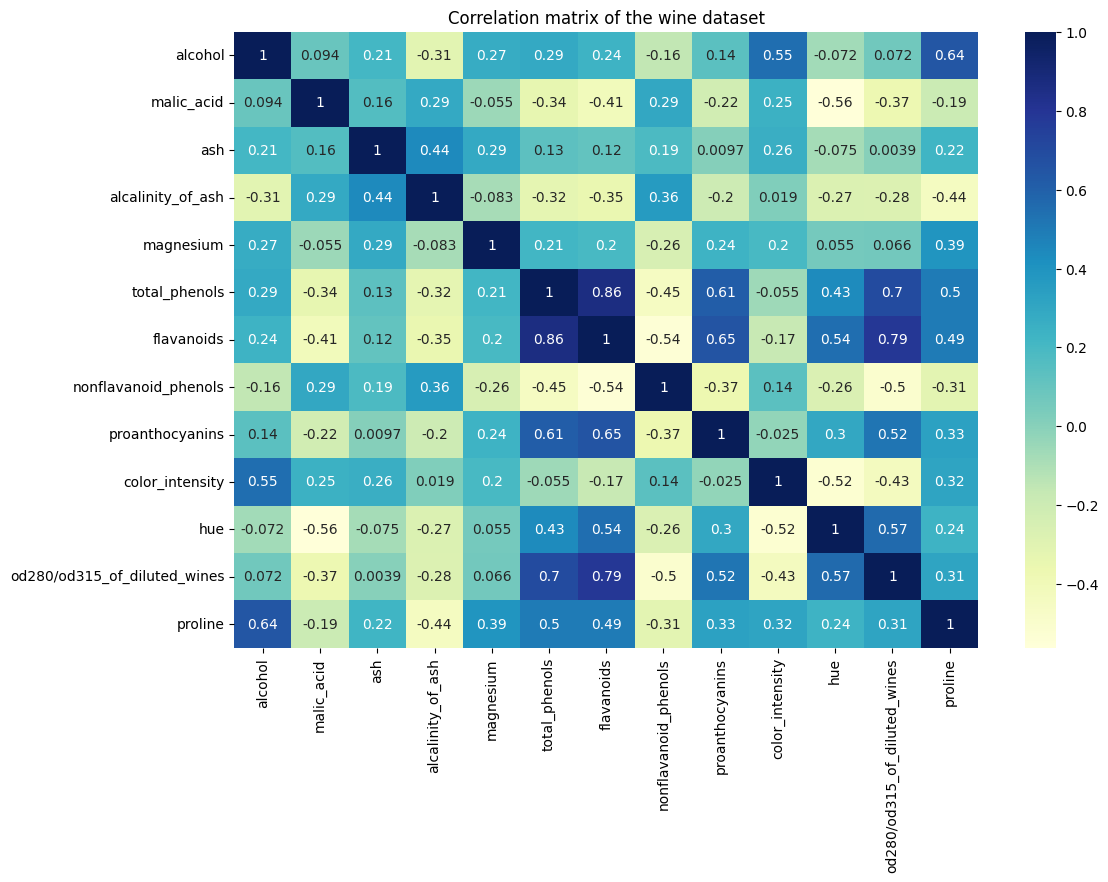

In [45]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation matrix of the wine dataset")

#### Identifing the feature with highest correlation values throughout the dataset

In [46]:
# fucntion to identify the most correlated feature
def identify_the_most_correlated_feature(correlation_matrix:pd.DataFrame):
    # set diagonal to nan
    np.fill_diagonal(correlation_matrix.values, np.nan)

    highest_correlation = None
    name_of_feature = None

    columns = correlation_matrix.columns
    for column in columns:
        current = correlation_matrix[column].max()
        if highest_correlation is None or current > highest_correlation:
            highest_correlation = current
            name_of_feature = column

    return name_of_feature

In [47]:
highest_correlation = identify_the_most_correlated_feature(corr_matrix)
print("The highest correlation is: ", highest_correlation)

The highest correlation is:  total_phenols


#### Removing the most correlated feature from dataset and then checikng accuracy again

In [48]:
# crate a copy of dataset
df_with_removed_feature = df.copy()
df_with_removed_feature['target'] = y
df_with_removed_feature.drop(highest_correlation, axis=1, inplace=True)
df_with_removed_feature.head(15)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [49]:
test_size = 0.3
random_states = [12, 21, 22, 28, 42, 55, 66, 78, 88, 93, 101, 123, 156, 189, 212]

x_dataset = df_with_removed_feature.drop('target', axis=1)
y_dataset = df_with_removed_feature['target']

performances_with_removed_feature = check_accuracy_with_different_random_states(x_dataset, y_dataset, random_states, test_size)

df_perfomances_with_removed_feature = pd.DataFrame(performances_with_removed_feature.items(), columns=['Random state', 'Accuracy'])
df_perfomances_with_removed_feature.head(15)

,Random state,Accuracy
0,12,74.07%
1,21,64.81%
2,22,72.22%
3,28,74.07%
4,42,75.93%
5,55,77.78%
6,66,68.52%
7,78,70.37%
8,88,68.52%
9,93,68.52%


#### Combine dataframes to look for the differences between accuracy

In [50]:
df_combined = pd.merge(df_perfomances, df_perfomances_with_removed_feature, on='Random state')
df_combined.columns = ['Random state', 'Accuracy with all features','Accuracy with removed feature']
df_combined.head(15)


,Random state,Accuracy with all features,Accuracy with removed feature
0,12,74.07%,74.07%
1,21,64.81%,64.81%
2,22,72.22%,72.22%
3,28,74.07%,74.07%
4,42,75.93%,75.93%
5,55,77.78%,77.78%
6,66,68.52%,68.52%
7,78,70.37%,70.37%
8,88,68.52%,68.52%
9,93,68.52%,68.52%


#### I will be removing fetures until i will se a difference on a singular state : 42


In [76]:
state_to_check = 42
test_size = 0.3

# Main logic
new_data_frame = X.copy()
new_data_frame['target'] = y

# Check initial performance
performance_before = check_accuracy_with_different_random_states(new_data_frame, y, [state_to_check], test_size)
dict_with_performance = {13: performance_before[state_to_check]}

x_dataset = new_data_frame.drop('target', axis=1)

while x_dataset.shape[1] > 2:

    temp_df = new_data_frame.drop('target', axis=1)
    most_correlated_feature = identify_the_most_correlated_feature(temp_df.corr())

    new_data_frame.drop(most_correlated_feature, axis=1, inplace=True)

    # Split data into features and target
    x_dataset = new_data_frame.drop('target', axis=1)
    y_dataset = new_data_frame['target']

    # Check accuracy with reduced features
    performances_with_removed_feature = check_accuracy_with_different_random_states(x_dataset, y_dataset, [state_to_check], test_size)

    # Store performance
    dict_with_performance[len(x_dataset.columns)] = performances_with_removed_feature[state_to_check]

# Create DataFrame for performance
df_performance = pd.DataFrame(dict_with_performance.items(), columns=['Number of features', 'Accuracy'])
df_performance.head(15)


,Number of features,Accuracy
0,13,75.93%
1,12,75.93%
2,11,75.93%
3,10,75.93%
4,9,75.93%
5,8,75.93%
6,7,75.93%
7,6,75.93%
8,5,75.93%
9,4,75.93%


### Scaling the data

In [52]:
# scale the dataset
scaled_data = X.copy()
scaled_data = scaled_data.apply(zscore)
scaled_data['target'] = y

# chceck the performance
random_states = [12, 21, 22, 28, 42, 55, 66, 78, 88, 93, 101, 123, 156, 189, 212]
test_size = 0.3

performances = check_accuracy_with_different_random_states(scaled_data, y, random_states, test_size)

df_perfomances = pd.DataFrame(performances.items(), columns=['Random state', 'Accuracy'])
df_perfomances.head(15)



,Random state,Accuracy
0,12,96.3%
1,21,98.15%
2,22,96.3%
3,28,98.15%
4,42,98.15%
5,55,98.15%
6,66,96.3%
7,78,100.0%
8,88,100.0%
9,93,94.44%


In [75]:
state_to_check = 42
test_size = 0.3

# Main logic
new_data_frame = scaled_data.copy()
new_data_frame['target'] = y

# Check initial performance
performance_before = check_accuracy_with_different_random_states(new_data_frame, y, [state_to_check], test_size)
dict_with_performance = {13: performance_before[state_to_check]}

x_dataset = new_data_frame.drop('target', axis=1)

while x_dataset.shape[1] > 2:

    temp_df = new_data_frame.drop('target', axis=1)
    most_correlated_feature = identify_the_most_correlated_feature(temp_df.corr())

    new_data_frame.drop(most_correlated_feature, axis=1, inplace=True)

    # Split data into features and target
    x_dataset = new_data_frame.drop('target', axis=1)
    y_dataset = new_data_frame['target']

    # Check accuracy with reduced features
    performances_with_removed_feature = check_accuracy_with_different_random_states(x_dataset, y_dataset, [state_to_check], test_size)

    # Store performance
    dict_with_performance[len(x_dataset.columns)] = performances_with_removed_feature[state_to_check]

# Create DataFrame for performance
df_performance = pd.DataFrame(dict_with_performance.items(), columns=['Number of features', 'Accuracy'])
df_performance.head(15)


,Number of features,Accuracy
0,13,98.15%
1,12,98.15%
2,11,98.15%
3,10,96.3%
4,9,96.3%
5,8,98.15%
6,7,96.3%
7,6,96.3%
8,5,98.15%
9,4,94.44%
